<a href="https://colab.research.google.com/github/Paolo20224/ProjectZero/blob/main/nutrients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
# Realizar el analisis exploratorio de data (duplicados, nulos, columnas erroneas). 
# Luego realizar 4 gráficos con sus correspondientes explicaciones, tengan en cuenta la estetica de las ilustraciones.
# Bajo su concepto, generar una salida OUTCOME de clasificación, a criterio de cada uno, y una columna PREDICTION, aleatoria con lo que seria el resultado de un modelo. 
# Generar la matriz de confusión, calcular el RECALL. 
# Generar una presentación con 4 slides, titulo, objetivos, metodologia, graficos y 2 conclusiones.
# enviar a jortiz@codingdojo.cl

In [279]:
#Iniciamos el análisis de nuestro Dataframe, incorporando nuestra información bruta en Colab
import pandas as pd
filename = "/content/nutrients_csvfile.csv"
df = pd.read_csv(filename)

1. Analisis y Limpieza de Dataframe

In [280]:
#Una vez cargada la informacion, verificamos los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [281]:
#Con relacion al cuadro anterior, podemos verificar que a priori existen ciertas variables que deberian tener una calificacion de tipo numerica o flotante,
#sin embargo poseen una clasificacion de tipo objeto, para ello realizaremos una exportacion del archivo en formato excel para revisar el porque se da esta situacion.
# Premisa: todas las columnas desde "Grams" hasta "Carbs" deberian ser numericas y/o flotantes, ya que son variables que por definicion son cuantificables.
df.to_excel("df_nutrients.xlsx", index=False)

In [282]:
#Con base a la descarga del archivo podemos 2 elementos de contaminacion de nuestro Dataframe:
# 1. Letras & Caracteres: Existen varias columnas que poseen algunas letras; "t", "a", "t´", "-" lo que genera distorsion en la lectura de la información, para ello reemplazaremos dichos valores
#por 0 o "", y veremos que consistencia mantienen una vez modificada la base.
# 2. Separadores: la base original csv, posee elementos de separacion "," sin embargo esto genera confunsion, debido a que existen algunos numeros que incluyen "," dentro de su notacion,
# estos mismos seran reemplazados por "." a efectos de evitar errores y/o confunsion dentro de nuestro DF.
df2=df
df2['Grams'] = df2['Grams'].str.replace(",", ".").astype(float)

In [283]:
df2['Calories'] = df2['Calories'].replace("8-44","8.44")
df2['Calories'] = df2['Calories'].str.replace(",", ".").astype(float)
df2["Calories"].mean()

177.68903592814374

In [284]:
df2['Protein'] = df2['Protein'].replace("t", 0)
df2['Protein'] = df2['Protein'].replace(-1, 0)
df2['Protein'] = df2['Protein'].str.replace(",", ".").astype(float)
df2["Protein"].mean()

9.702702702702704

In [285]:
df2['Fat'] = df2['Fat'].replace("t", 0)
df2['Fat'] = df2['Fat'].replace("t'", 0)
df2['Fat'] = df2['Fat'].str.replace(",", ".").astype(float)
df2["Fat"].mean()

13.06392694063927

In [286]:
df2['Sat.Fat'] = df2['Sat.Fat'].replace("t", 0)
df2['Sat.Fat'] = df2['Sat.Fat'].replace("", 0)
df2['Sat.Fat'] = df2['Sat.Fat'].str.replace(",", ".").astype(float)
df2["Sat.Fat"].mean()

6.7421383647798745

In [287]:
df2['Fiber'] = df2['Fiber'].replace("t", 0)
df2['Fiber'] = df2['Fiber'].replace("a", 0)
df2['Fiber'] = df2['Fiber'].str.replace(",", ".").astype(float)
df2["Fiber"].mean()

2.576655844155844

In [288]:
df2['Carbs'] = df2['Carbs'].replace("t", 0)
df2['Carbs'] = df2['Carbs'].str.replace(",", ".").astype(float)
df2["Carbs"].mean()

25.99099378881988

In [289]:
# Como podemos ver casi todas las columnas pasaron de una configuracion de tipo "object" a "float" que es una de las premisas principales definidas anteriormente.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    object 
 2   Grams     335 non-null    float64
 3   Calories  334 non-null    float64
 4   Protein   296 non-null    float64
 5   Fat       219 non-null    float64
 6   Sat.Fat   318 non-null    float64
 7   Fiber     308 non-null    float64
 8   Carbs     322 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(7), object(3)
memory usage: 26.3+ KB


In [290]:
#A continuacion revisaremos la estadistica descriptiva de nuestro DF corregido
df2.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,335.000000,334.000000,296.000000,219.000000,318.000000,308.000000,322.000000
mean,138.980355,177.689036,9.702703,13.063927,6.742138,2.576656,25.990994
std,119.991933,155.901355,18.575895,23.262671,18.896435,16.729786,36.189993
min,1.419000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,72.750000,1.000000,1.000000,0.000000,0.000000,6.000000
50%,108.000000,129.000000,4.000000,8.000000,0.000000,0.400000,15.000000
75%,200.000000,245.000000,13.000000,14.000000,8.000000,1.200000,32.000000
max,984.000000,992.000000,232.000000,233.000000,234.000000,235.000000,236.000000


In [291]:
#Como ya hemos corregido elementos de formato y ciertas nomenclaturas incorrectas, ahora revisaremos la consistencia general de los datos
df2.to_excel("df_nutrientsv2.xlsx", index=False)

In [306]:
#A continuacion procederedemos a realizar ciertos cambios que a priori tanto por el tipo de comida y medida, poseen elementos de gramos y calories subvaluadas (en base a valores publicados en google)
# Por otra parte no pueden existir elementos negativos en las columnas valoricas(caso de proteina), debido a que hablamos de nutrientes (solo aplican valores positivos)
df2['Grams'] = df2['Grams'].replace(1.419,1419)
df2['Calories'] = df2['Calories'].replace(1.373,1373)
df2['Calories'] = df2['Calories'].replace(1.225,1225)
df2['Protein'] = df2['Protein'].replace(-1,0)
df2.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,335.000000,334.000000,296.000000,219.000000,318.000000,308.000000,322.000000
mean,143.211940,185.459701,9.706081,13.063927,6.742138,2.576656,25.990994
std,138.668626,177.882744,18.574032,23.262671,18.896435,16.729786,36.189993
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,1.000000,0.000000,0.000000,6.000000
50%,108.000000,130.000000,4.000000,8.000000,0.000000,0.400000,15.000000
75%,200.000000,248.750000,13.000000,14.000000,8.000000,1.200000,32.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


2. Analisis de Variables Claves y Tendencia

In [320]:
#A continuacion crearemos una nueva variable que nos permitira analizar el nivel de calorias por categoria de manera comparable, por lo cual analizaremos el nivel de calorias para cada producto en un nivel de 1.000 gramos
df3=df2
df3["Cal_Rate_1000gm"]= (1000/df3["Grams"])*df3["Calories"]
df3["Cal_Rate_1000gm"].mean()

2029.875040292925

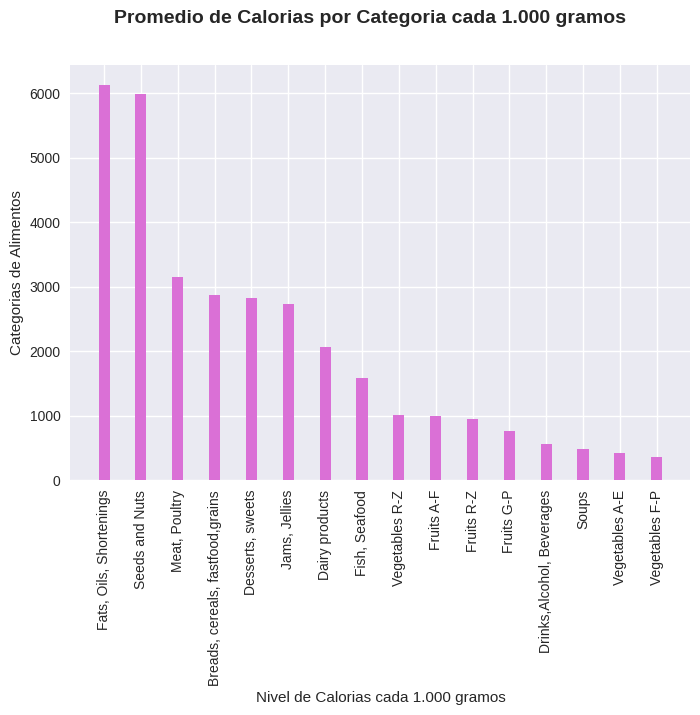

In [323]:
df3=df.groupby(['Category'])[['Cal_Rate_1000gm']].mean().reset_index().sort_values(by="Cal_Rate_1000gm",ascending=False)

import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

plt.style.use('seaborn')

fig1 = plt.figure(dpi=100)
fig1.suptitle("Promedio de Calorias por Categoria cada 1.000 gramos", fontsize=14, fontweight="bold", )

ax1 = fig1.add_subplot(111)
sep = 0.3
ax1.bar(df3["Category"],df3["Cal_Rate_1000gm"], sep, color='orchid')

plt.xticks(rotation=90)
plt.ylabel("Categorias de Alimentos")
plt.xlabel("Nivel de Calorias cada 1.000 gramos")
plt.show()